<a href="https://colab.research.google.com/github/priyanshunayak05/NLP/blob/main/Humor_Detection_with_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 16.7 MB/s eta 0:00:00


Gensim is a free, open-source Python library for topic modelling, document indexing, and similarity retrieval across large bodies of text

It handles unstructured text (“plain text”) and uses unsupervised ML/statistical methods (e.g., Word2Vec, Doc2Vec, FastText, LDA, LSI) to discover semantic structure.

1. Load the dataset






In [7]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Download NLTK dependencies (only first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
df = pd.read_csv("funny_texts.csv")
print(df.head())

                                                text  label
0  Why do Java developers wear glasses? Because t...      1
1     I told my computer I needed a break… it froze.      1
2  Debugging is like being the detective in a cri...      1
3  Why did the neural network go to therapy? Too ...      1
4       My data went on a date… now it’s an outlier.      1


2. Text Preprocessing


In [14]:
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join back to string
    cleaned_text = " ".join(tokens)

    return cleaned_text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)


#  View Sample Output


print("\n Sample Preprocessed Text:")
print(df[['text', 'clean_text']].head(10))

df.to_csv("clean_funny_texts.csv", index=False)
print("\n Clean dataset saved as 'clean_funny_texts.csv'")



 Sample Preprocessed Text:
                                                text  \
0  Why do Java developers wear glasses? Because t...   
1     I told my computer I needed a break… it froze.   
2  Debugging is like being the detective in a cri...   
3  Why did the neural network go to therapy? Too ...   
4       My data went on a date… now it’s an outlier.   
5  Why did the variable break up with the constan...   
6  I told my boss I made a machine that turns stu...   
7  Parallel lines have so much in common. It’s a ...   
8  I told my girlfriend she drew her eyebrows too...   
9  Why don’t skeletons fight each other? They don...   

                                          clean_text  
0                      java developer wear glass ’ c  
1                  told computer needed break… froze  
2  debugging like detective crime movie also murd...  
3    neural network go therapy many unresolved layer  
4                          data went date… ’ outlier  
5              variable b

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Step 1: Import & Load Clean Dataset

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your cleaned dataset
df = pd.read_csv("clean_funny_texts.csv")

# Optional: Encode labels (0 = not funny, 1 = funny)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
                                                text  label  \
0  Why do Java developers wear glasses? Because t...      1   
1     I told my computer I needed a break… it froze.      1   
2  Debugging is like being the detective in a cri...      1   
3  Why did the neural network go to therapy? Too ...      1   
4       My data went on a date… now it’s an outlier.      1   

                                          clean_text  
0                      java developer wear glass ’ c  
1                  told computer needed break… froze  
2  debugging like detective crime movie also murd...  
3    neural network go therapy many unresolved layer  
4                          data went date… ’ outlier  


Step 2: Split Data into Train & Test


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 48
Test size: 13


One-Hot Encoding

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

v_onehot = CountVectorizer(binary=True)  # binary=True → one-hot style
X_train_onehot = v_onehot.fit_transform(X_train)
X_test_onehot = v_onehot.transform(X_test)

print("One-Hot Encoding done!")
print("Shape:", X_train_onehot.shape)

One-Hot Encoding done!
Shape: (48, 229)


Bag of Words

In [21]:
v_bow = CountVectorizer(max_features=5000)
X_train_bow = v_bow.fit_transform(X_train)
X_test_bow = v_bow.transform(X_test)

print("BoW done!")
print("Shape:", X_train_bow.shape)

BoW done!
Shape: (48, 229)


TF-IDF

In [22]:
v_tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = v_tfidf.fit_transform(X_train)
X_test_tfidf = v_tfidf.transform(X_test)

print("✅ TF-IDF done!")
print("Shape:", X_train_tfidf.shape)

✅ TF-IDF done!
Shape: (48, 229)


Word2Vec

In [28]:
import numpy as np
from nltk.tokenize import word_tokenize

# Tokenize again (if needed)
tokenized_train = [word_tokenize(text) for text in X_train]
tokenized_test = [word_tokenize(text) for text in X_test]

# Function to average word vectors
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(model.vector_size)

# Compute average vectors for each sentence
X_train_w2v = np.array([get_avg_vector(words, model_w2v) for words in tokenized_train])
X_test_w2v = np.array([get_avg_vector(words, model_w2v) for words in tokenized_test])

print(" Word2Vec vectors ready:", X_train_w2v.shape, X_test_w2v.shape)

 Word2Vec vectors ready: (48, 100) (13, 100)


Logistic Regression for One-Hot, BoW, TF-IDF

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(X_train, X_test, y_train, y_test, name):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    return acc

# Compare traditional embeddings
acc_onehot = train_and_evaluate(X_train_onehot, X_test_onehot, y_train, y_test, "One-Hot Encoding")
acc_bow = train_and_evaluate(X_train_bow, X_test_bow, y_train, y_test, "Bag of Words")
acc_tfidf = train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")


 One-Hot Encoding Accuracy: 0.7692
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13


 Bag of Words Accuracy: 0.7692
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13


 TF-IDF Accuracy: 0.6923
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.57      0.80      0.67         5

    accuracy                           0.69        13
   macro avg       0.70      0.71 

LSTM (Deep Learning) for Word2Vec

In [29]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Input

# Build simple LSTM model
def build_lstm_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [31]:
def train_lstm(X_train, X_test, y_train, y_test, name):
    model = build_lstm_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2, verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n🔹 {name} Accuracy: {acc:.4f}")
    return acc

acc_w2v = train_lstm(X_train_w2v, X_test_w2v, y_train, y_test, "Word2Vec")


🔹 Word2Vec Accuracy: 0.6154


In [33]:
results = {
    "One-Hot": acc_onehot,
    "BoW": acc_bow,
    "TF-IDF": acc_tfidf,
    "Word2Vec": acc_w2v,

}

print("\n📈 Model Comparison:")
for name, acc in results.items():
    print(f"{name:10s}: {acc:.4f}")



📈 Model Comparison:
One-Hot   : 0.7692
BoW       : 0.7692
TF-IDF    : 0.6923
Word2Vec  : 0.6154


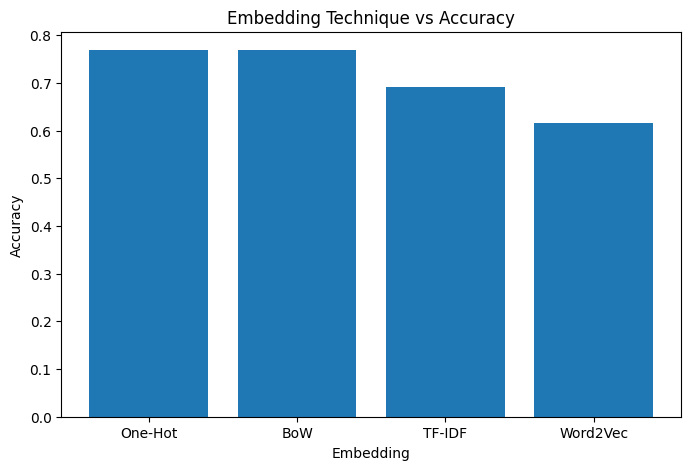

In [34]:
import matplotlib.pyplot as plt

models = ["One-Hot", "BoW", "TF-IDF", "Word2Vec"]
accuracies = [acc_onehot, acc_bow, acc_tfidf, acc_w2v]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title("Embedding Technique vs Accuracy")
plt.xlabel("Embedding")
plt.ylabel("Accuracy")
plt.show()
